In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
df_index = pd.read_csv("D:\\Datasets\\LR\\economic_index.csv")
df_index

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


## Data Cleaning

In [5]:
# drop unnecessary columns
df_index.drop(columns = ['Unnamed: 0','year','month'],axis=1,inplace = True)

In [6]:
df_index

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [7]:
#Checking for null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

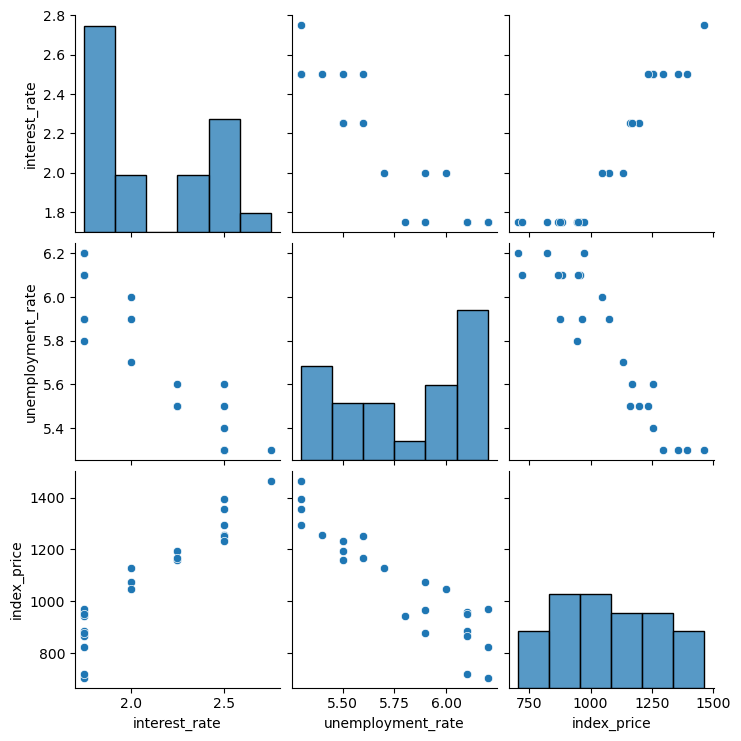

In [8]:
# Visualisation
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

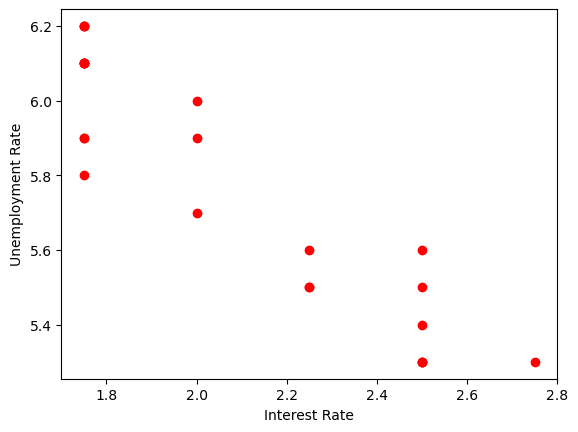

In [10]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

## Independent and Dependent feature

In [12]:
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

or

X = df_index[['interest_rate','unemployment_rate']]

In [14]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [15]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

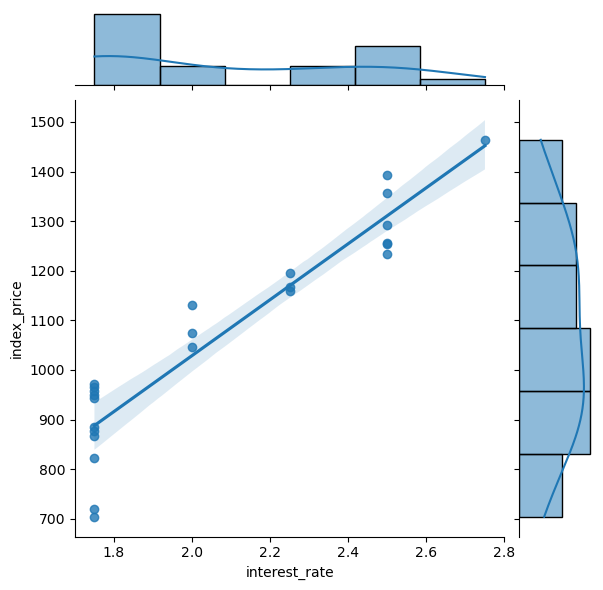

In [18]:
sns.jointplot(data = df_index, x = 'interest_rate', y = 'index_price', kind = 'reg')

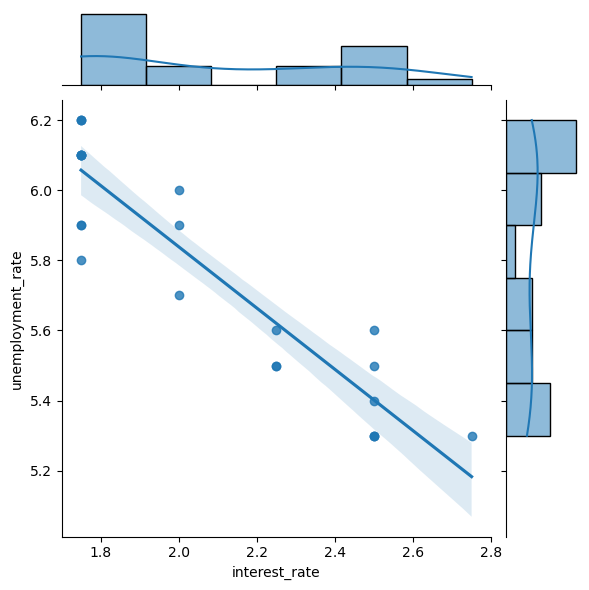

In [19]:
sns.jointplot(data = df_index, x = 'interest_rate', y = 'unemployment_rate', kind = 'reg')

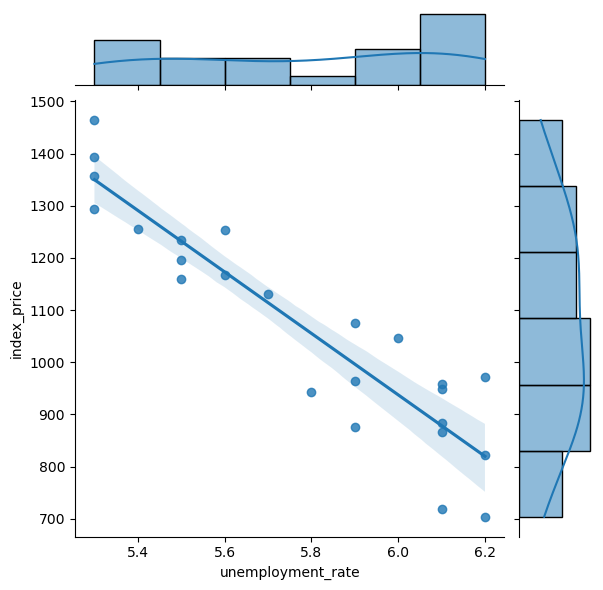

In [20]:
sns.jointplot(data = df_index, x = 'unemployment_rate', y = 'index_price', kind = 'reg')

## Standardisation

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [26]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [27]:
regression.fit(X_train,y_train)

LinearRegression()

## Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv = 3)

In [30]:
cvs

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [31]:
np.mean(cvs)

-5914.828180162388

## Prediction

In [33]:
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

## Performance Metrics

In [35]:
 from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [37]:
from sklearn.metrics import r2_score

In [38]:
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [39]:
adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r2

0.5985619231683761

## Assumptions

### 1. Scatter plot between y_test and y_pred

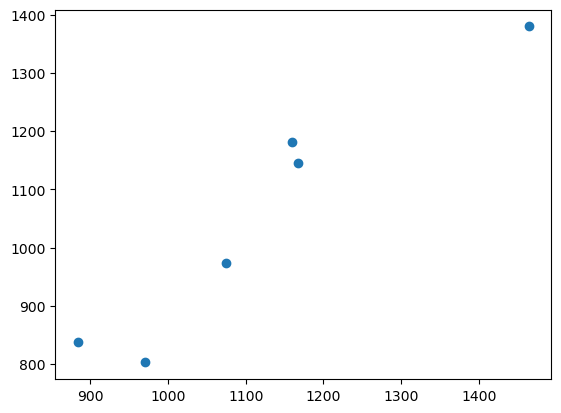

In [42]:
plt.scatter(y_test,y_pred)

### If plot between y_pred and y_test is linear means the model has performed well

### 2. Residual plot

In [45]:
residuals = y_test - y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

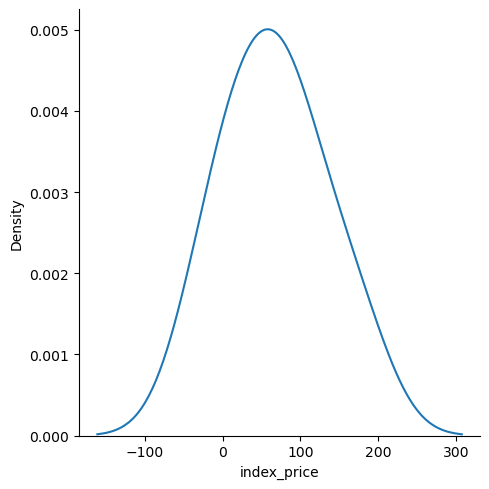

In [46]:
sns.displot(residuals,kind='kde')

### If normal distribution means the model is good.

### 3. Scatter plot wrt prediction and residual

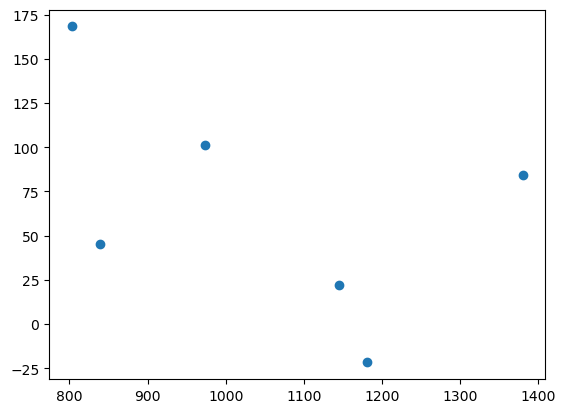

In [49]:
plt.scatter(y_pred,residuals)

### Data is distributed uniformly. Doesn't follow any patterns. 

## OLS Linear Regression

In [52]:
import statsmodels.api as sm

In [53]:
model = sm.OLS(y_train,X_train).fit()

In [54]:
prediction = model.predict(X_test)
prediction

array([ 127.30223686, -250.70164745,  326.390126  , -214.91844842,
        -79.59130481,   91.51903783])

In [55]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                       0.754
Time:                        10:21:41   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [56]:
print(regression.coef_)

[  88.27275507 -116.25716066]
